# chOO.시각화

## matplotlib
* ref : https://matplotlib.org/stable/gallery/index.html
* ref : https://wikidocs.net/92071
* ref : https://wikidocs.net/141537

In [1]:
# ! pip install matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline   
#cell  magic

### Basic

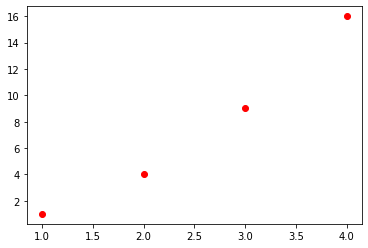

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.show()

### 제목, 레이블, 범례, 그리드

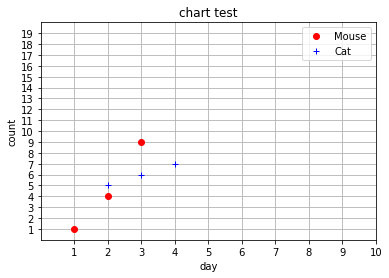

In [5]:
plt.plot([1,2,3], [1,4,9], 'ro')       #-------------------- 차트&데이터
plt.plot([2,3,4], [5,6,7], 'b+')     

plt.title('chart test')                #-------------------- 제목
plt.xlabel('day')                      #-------------------- 레이블
plt.ylabel('count')

plt.legend(['Mouse', 'Cat'])           #-------------------- 범례
plt.grid(True)                         #-------------------- 그리드격자

plt.xlim(0, 10)                        #-------------------- x축,y축 눈금
plt.ylim(0, 20)               
plt.xticks(range(1, 11)) #([0, 1, 2])  #-------------------- x축,y축 눈금값
plt.yticks(np.arange(1, 20))         

plt.show()

### Bar chart

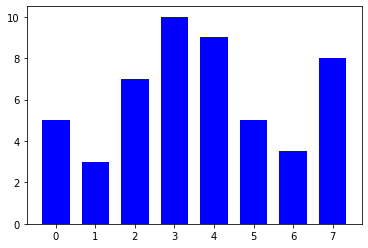

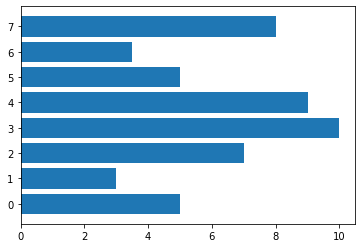

In [6]:
y = [5, 3, 7, 10, 9, 5, 3.5, 8]
x = range(len(y))
plt.bar(x, y, width=0.7, color="blue")    
plt.show()

plt.barh(x, y)
plt.show()

### histogram
*  도수분포표 : x축(계급), y축(도수,갯수)

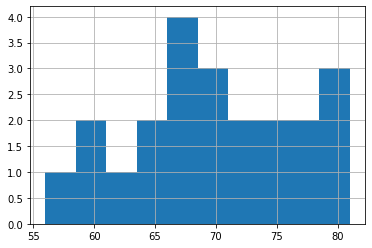

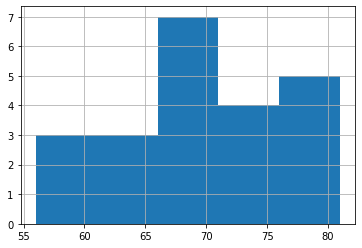

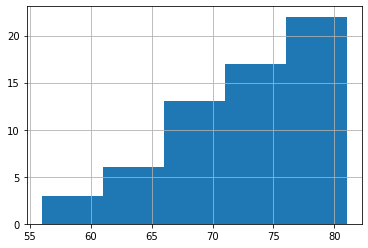

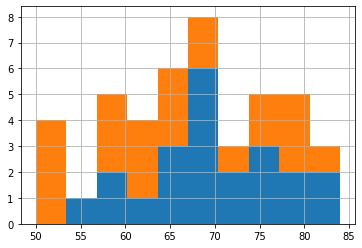

In [7]:
data  = [68, 81, 64, 56, 78, 74, 61, 77, 66, 68, 59, 71, 80, 59, 67, 81, 69, 73, 69, 74, 70, 65]
data2 = [52, 67, 84, 66, 58, 78, 71, 57, 76, 62, 51, 79, 69, 64, 76, 57, 63, 53, 79, 64, 50, 61]

plt.hist(data)
plt.grid()
plt.show()

plt.hist(data, bins=5)
plt.grid()
plt.show()


plt.hist(data,  bins=5, cumulative=True)
plt.grid()
plt.show()

plt.hist((data, data2), histtype='barstacked')  # histtype='bar'
plt.grid()
plt.show()


### heatmap

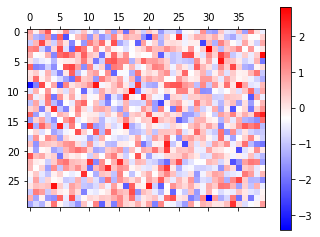

In [8]:
arr = np.random.standard_normal((30, 40))

plt.matshow(arr, cmap='bwr')  #BuGn
plt.colorbar()
plt.show()

### scatter

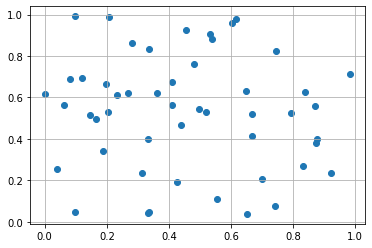

In [9]:
x = np.random.rand(50)
y = np.random.rand(50)
plt.scatter(x, y)
plt.grid()
plt.show()

## 여러 개의 그래프 그리기

### subplot()

<img src="https://wikidocs.net/images/page/141537/subplot_03.png" width=700>

In [10]:
dic = { 'name':['apple','banana','lemon', 'orange'] , 'cnt': [10,15,5,20]}
df = pd.DataFrame(dic)
df.head() 

,name,cnt
0,apple,10
1,banana,15
2,lemon,5
3,orange,20


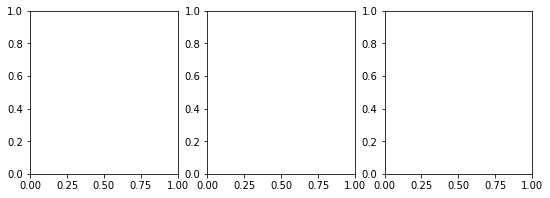

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3)) 

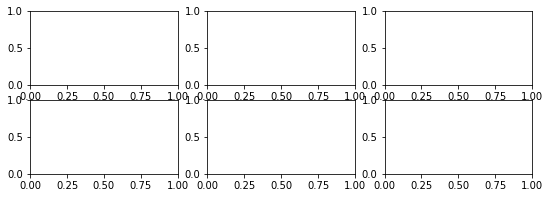

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(9, 3)) 

#### (방법1) subplot 5개에 차트 그려보기
* plt.subplots(1, 4, figsize=(16, 3)) 

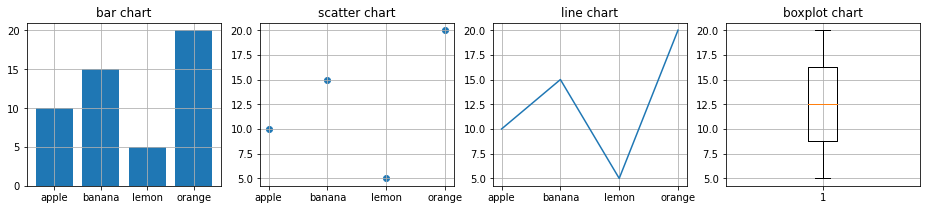

In [23]:
plt.subplots(1, 4, figsize=(16, 3))  # 1행 4열 그래프를 16:3비율 크기로 그리기

plt.subplot(1, 4, 1) 
plt.title('bar chart')
plt.grid()
plt.bar(df['name'], df['cnt'])

plt.subplot(1, 4, 2)
plt.title('scatter chart')
plt.grid()
plt.scatter(df['name'], df['cnt'])

plt.subplot(1, 4, 3)
plt.title('line chart')
plt.grid()
plt.plot(df['name'], df['cnt'])

plt.subplot(1, 4, 4)
plt.title('boxplot chart')
plt.grid()
plt.boxplot(df['cnt'])     # [10,15,5,20] = 평균12.5 최대20 최소5


plt.show()

#### (방법2) subplot 4개에 차트 그려보기
* 이전방법 : plt.subplots(1, 4, figsize=(16, 3))
* 편한방법 : myfig, myax = plt.subplots(1, 4, figsize=(16, 3))

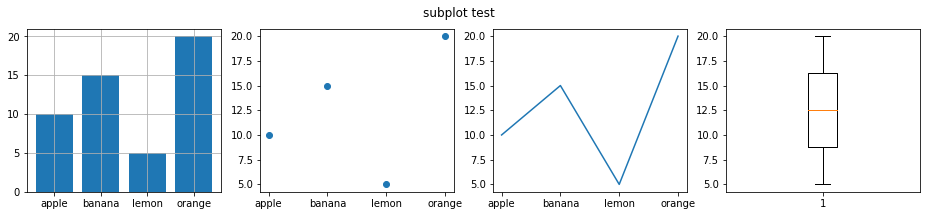

In [14]:
myall, my = plt.subplots(1, 4, figsize=(16, 3))    # 1행 4열 그래프를 16:3비율 크기로 그리기

my[0].bar(df['name'], df['cnt'])
my[1].scatter(df['name'], df['cnt'])
my[2].plot(df['name'], df['cnt'])
my[3].boxplot(df['cnt'])

my[0].grid()
myall.suptitle('subplot test')

plt.show()

#### (방법3) subplot 2개에 차트 그려보기
* 첫번째 subplot :  라인차트(plot) 2개 그리기
* 두번째 subplot :  라인차트(plot) 1개 그리기

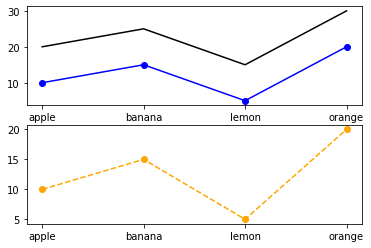

In [15]:
# plt.subplot(2,1,1)
plt.subplot(211)
plt.plot(df['name'], df['cnt']+10  , color='black')
plt.plot(df['name'], df['cnt']     , color='blue'    , marker='o')

# plt.subplot(2,1,2)
plt.subplot(212)
plt.plot(df['name'], df['cnt']     , color='orange' , marker='o' , linestyle='--')
plt.show()

#### subplot 2개에 Pie 차트 그려보기

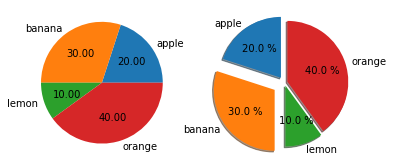

In [16]:
myfig, myax = plt.subplots(1, 2)
myax[0].pie(df['cnt'], labels=df['name'], autopct='%.2f')
myax[1].pie(df['cnt'], labels=df['name'], explode=[0.1, 0.2, 0.05, 0.05], autopct='%.1f %%', shadow=True, startangle=90)
plt.show()


### twinx() : y축이 좌,우 2개

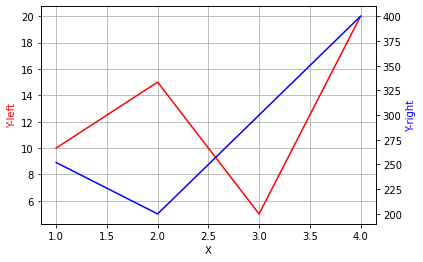

In [17]:

# Create some mock data
xdata  = [1,2,3,4]
ydata1 = [10,15,5,20]
ydata2 = [252,200,300,400]

myfig, myax = plt.subplots()
# -------------------------------------공통
myax.set_xlabel('X')
myax.grid()
# -------------------------------------왼쪽
myax.set_ylabel('Y-left' , color='red')
myax.plot(xdata, ydata1  , color='red')
# -------------------------------------오른쪽
myax_cp = myax.twinx()  #-------------- 왼쪽 y축  오른쪽으로 복제
myax_cp.set_ylabel('Y-right', color='blue') 
myax_cp.plot(xdata, ydata2  , color='blue')

plt.show()

## 차트 이미지로 저장하기

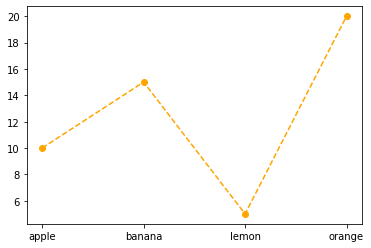

In [18]:
plt.plot(df['name'], df['cnt']     , color='orange' , marker='o' , linestyle='--')
plt.savefig('./lec15_chart_save.jpg')

## 저장한 차트이미지 불러오기

In [19]:
# ! pip install pillow
# ! pip install matplotlib

### (방법1) jupyter인 경우 마크다운에 &lt;HTML&gt;  사용
* &lt;img src='./lec15_chart_save.jpg' width='300' height='150'&gt; 

<img src='./lec15_chart_save.jpg' width='300' height='150'>

### (방법2) matplotlib 패키기 imshow() 사용

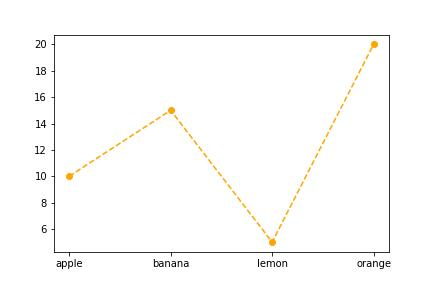

In [20]:
from matplotlib.pyplot import imshow
from PIL import Image

myimg = Image.open('./lec15_chart_save.jpg', 'r')
# plt.imshow(myimg)
# imshow(myimg)
# display(myimg)
myimg

### (방법3) pillow 패키지 display() 이용하기

In [21]:
from PIL import Image
myimg = Image.open('./lec15_chart_save.jpg')     #----------- 열기
print(myimg.size)                                #----------- 크기   
myimg.thumbnail(  (300, 75)  )                   #----------- 크기 변경
myimg.save('./lec15_chart_save222.jpg')          #----------- 저장

(432, 288)


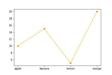

In [22]:
myimg = Image.open('./lec15_chart_save222.jpg')  #----------- 보기
display(myimg)
# myimg.show()  -------------------- jupyter가 멈춤.. 실행하지말것